In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 20             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -512            # valor mínimo de x
b = 512             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 50  # número de generaciones
etapas = 5        # número de etapas  

In [3]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [4]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[0 0 1 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [1 1 0 ... 1 1 1]
 ...
 [0 1 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


In [5]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [6]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [7]:
#def funcion(x):
    #return np.sum(x**2)
#def funcion(x,y):
     #return np.sum(x**2) # esfera
    #return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2) #rosenbrock
 #   return (x**2 + y - 11)**2 + (x + y**2 - 7)**2 #himmenblau

def funcion(x,y):
   term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
   term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
   return -(y + 47) * term1 - x * term2



In [8]:
def eva_funcion(ind, a, b, m, decimales):
    x,y= deco_ind(ind, a, b, m, decimales)
    return funcion(x,y)

In [9]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1
 1 0 0]
Fenotipo: [-344.021  441.31 ]
Evaluación f(x): 239.78247043166064

Individuo 2:
Genotipo: [1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0
 1 0 0]
Fenotipo: [106.228 429.333]
Evaluación f(x): 365.2845879601256

Individuo 3:
Genotipo: [1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0
 1 1 1]
Fenotipo: [379.532 267.429]
Evaluación f(x): -230.34752654116932

Individuo 4:
Genotipo: [1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1
 0 1 1]
Fenotipo: [295.149 -38.833]
Evaluación f(x): 279.13561352891486

Individuo 5:
Genotipo: [0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0
 0 0 0]
Fenotipo: [-236.516  341.673]
Evaluación f(x): 230.60729966907192

Individuo 6:
Genotipo: [1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1
 0 0 0]
Fenotipo: [ 132.603 -110.601]
Eval

In [10]:
def torneo(pob, m, a, b, decimales, epsilon):
    idx1 = np.random.randint(0, len(pob))
    idx2 = np.random.randint(0, len(pob))

    f1 = eva_funcion(pob[idx1],m, a, b, decimales)
    f2 = eva_funcion(pob[idx2],m, a, b, decimales)

    if f1 < f2:
        return pob[idx1], idx1
    else:
        return pob[idx2], idx2

In [11]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [12]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

In [13]:
def AG_etapas_torneo(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
                     etapas, generaciones):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    total_generacion = 0
    h = []      # Historial de la mejor evaluación en cada generación
    h_pp = []  # Historial del promedio de evaluaciones en cada generación
    
    elite = int(np.ceil(0.2 * pob_size))
    
    for eta in range(etapas):
        print(f"\n=== Etapa {eta+1} ===")
        eta_h = []
        eta_h_pp = []
        for gen in range(generaciones):
            total_generacion += 1
            evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
            mejor_ahora = min(evaluar)
            current_avg = np.mean(evaluar)
            eta_h.append(mejor_ahora)
            eta_h_pp.append(current_avg)
            h.append(mejor_ahora)
            h_pp.append(current_avg)

            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[evaluar.index(mejor_ahora)]

            if total_generacion % 10 == 0:
                print(f"Generación {total_generacion} - Mejor: {round(mejor_ahora, decimales)} | Promedio: {round(current_avg, decimales)}")

            #if round(mejor_ahora, decimales) <= target:
            #    print("Se ha alcanzado el objetivo")
            #   return mejor_hijo, mejor_ahora, total_generacion, h, h_pp 
            
            # elitismo
            sorted_indices = np.argsort(evaluar)
            elite_idx = [pob[i] for i in sorted_indices[:elite]]
            
            
            new_pob_elite = []
            while len(new_pob_elite) < (pob_size - elite):
                padre1, _ = torneo(pob, m, a, b, decimales, epsilon)
                padre2, _ = torneo(pob, m, a, b, decimales, epsilon)
                
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta)
                hijo2 = mutar(hijo2, proba_muta)
                
                new_pob_elite.append(hijo1)
                if len(new_pob_elite) < (pob_size - elite):
                    new_pob_elite.append(hijo2)
            
            pob = np.array(new_pob_elite + elite_idx)
        print(f"Fin de la Etapa {eta+1}: Mejor en etapa: {round(min(eta_h), decimales)} | Promedio etapa: {round(np.mean(eta_h_pp), decimales)}")
    
    return mejor_hijo, mejor_aptitud, total_generacion, h, h_pp

Iteración 1

=== Etapa 1 ===
Generación 10 - Mejor: -803.948 | Promedio: -638.37
Generación 20 - Mejor: -907.81 | Promedio: -685.631
Generación 30 - Mejor: -915.041 | Promedio: -780.374
Generación 40 - Mejor: -916.19 | Promedio: -667.877
Generación 50 - Mejor: -916.234 | Promedio: -789.151
Fin de la Etapa 1: Mejor en etapa: -916.234 | Promedio etapa: -648.215

=== Etapa 2 ===
Generación 60 - Mejor: -916.238 | Promedio: -796.76
Generación 70 - Mejor: -916.238 | Promedio: -756.643
Generación 80 - Mejor: -916.238 | Promedio: -776.831
Generación 90 - Mejor: -916.238 | Promedio: -739.086
Generación 100 - Mejor: -916.238 | Promedio: -716.546
Fin de la Etapa 2: Mejor en etapa: -916.238 | Promedio etapa: -763.642

=== Etapa 3 ===
Generación 110 - Mejor: -916.238 | Promedio: -825.1
Generación 120 - Mejor: -916.238 | Promedio: -729.15
Generación 130 - Mejor: -916.238 | Promedio: -825.543
Generación 140 - Mejor: -916.238 | Promedio: -705.031
Generación 150 - Mejor: -916.238 | Promedio: -748.505
F

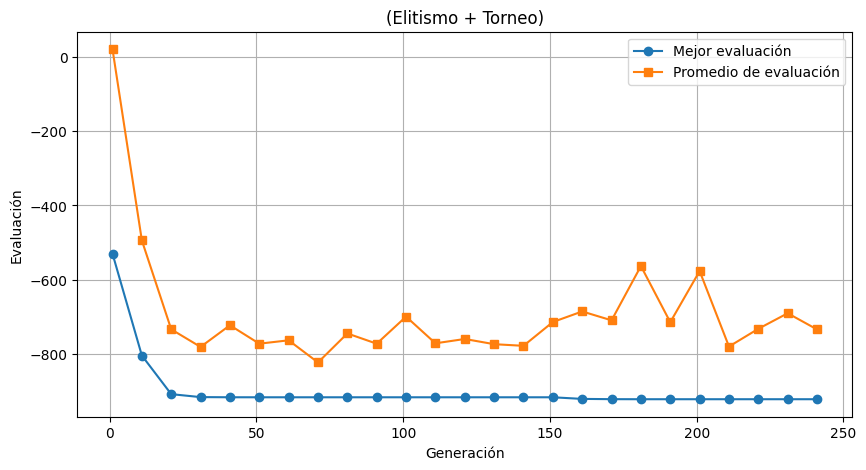

Iteración 2

=== Etapa 1 ===
Generación 10 - Mejor: -845.673 | Promedio: -674.166
Generación 20 - Mejor: -857.402 | Promedio: -706.711
Generación 30 - Mejor: -892.995 | Promedio: -687.045
Generación 40 - Mejor: -893.602 | Promedio: -690.473
Generación 50 - Mejor: -893.617 | Promedio: -732.116
Fin de la Etapa 1: Mejor en etapa: -893.617 | Promedio etapa: -632.176

=== Etapa 2 ===
Generación 60 - Mejor: -893.618 | Promedio: -646.084
Generación 70 - Mejor: -893.618 | Promedio: -739.979
Generación 80 - Mejor: -893.618 | Promedio: -702.553
Generación 90 - Mejor: -893.618 | Promedio: -587.707
Generación 100 - Mejor: -893.618 | Promedio: -682.403
Fin de la Etapa 2: Mejor en etapa: -893.618 | Promedio etapa: -720.047

=== Etapa 3 ===
Generación 110 - Mejor: -893.618 | Promedio: -741.863
Generación 120 - Mejor: -893.618 | Promedio: -649.046
Generación 130 - Mejor: -893.618 | Promedio: -757.174
Generación 140 - Mejor: -893.618 | Promedio: -682.326
Generación 150 - Mejor: -893.618 | Promedio: -72

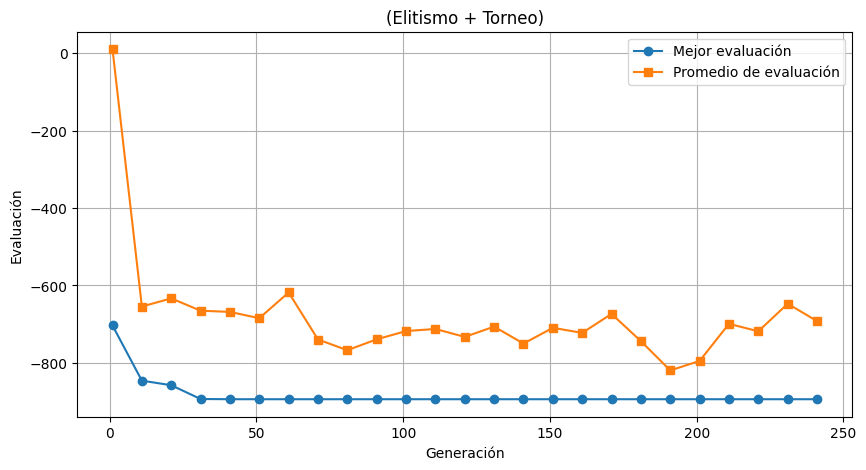

Iteración 3

=== Etapa 1 ===
Generación 10 - Mejor: -933.41 | Promedio: -769.321
Generación 20 - Mejor: -934.381 | Promedio: -812.913
Generación 30 - Mejor: -934.568 | Promedio: -801.169
Generación 40 - Mejor: -934.588 | Promedio: -762.023
Generación 50 - Mejor: -934.588 | Promedio: -820.182
Fin de la Etapa 1: Mejor en etapa: -934.588 | Promedio etapa: -712.252

=== Etapa 2 ===
Generación 60 - Mejor: -934.588 | Promedio: -799.576
Generación 70 - Mejor: -934.588 | Promedio: -830.906
Generación 80 - Mejor: -934.588 | Promedio: -868.184
Generación 90 - Mejor: -934.588 | Promedio: -784.013
Generación 100 - Mejor: -934.588 | Promedio: -771.824
Fin de la Etapa 2: Mejor en etapa: -934.588 | Promedio etapa: -801.691

=== Etapa 3 ===
Generación 110 - Mejor: -934.588 | Promedio: -793.537
Generación 120 - Mejor: -934.588 | Promedio: -818.378
Generación 130 - Mejor: -934.588 | Promedio: -856.462
Generación 140 - Mejor: -934.588 | Promedio: -799.547
Generación 150 - Mejor: -934.588 | Promedio: -696

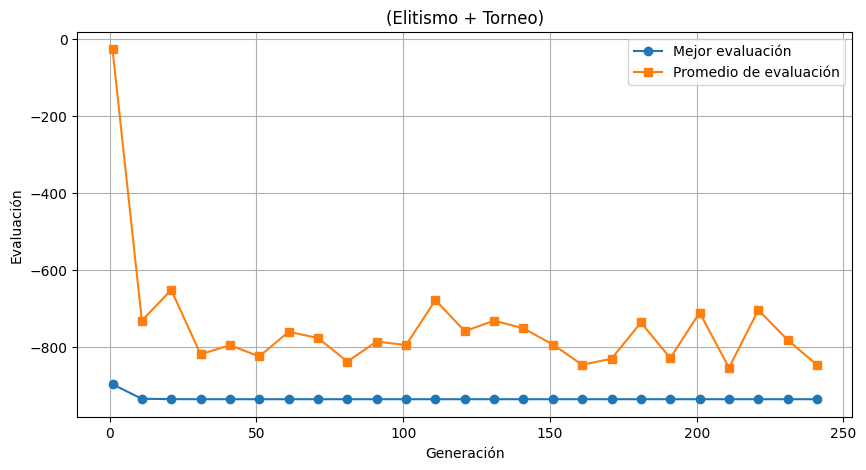

Iteración 4

=== Etapa 1 ===
Generación 10 - Mejor: -952.949 | Promedio: -598.967
Generación 20 - Mejor: -955.4 | Promedio: -792.496
Generación 30 - Mejor: -955.455 | Promedio: -843.022
Generación 40 - Mejor: -955.697 | Promedio: -832.878
Generación 50 - Mejor: -955.84 | Promedio: -785.805
Fin de la Etapa 1: Mejor en etapa: -955.84 | Promedio etapa: -655.207

=== Etapa 2 ===
Generación 60 - Mejor: -955.853 | Promedio: -767.947
Generación 70 - Mejor: -955.853 | Promedio: -728.018
Generación 80 - Mejor: -955.853 | Promedio: -719.267
Generación 90 - Mejor: -955.853 | Promedio: -715.862
Generación 100 - Mejor: -955.853 | Promedio: -727.061
Fin de la Etapa 2: Mejor en etapa: -955.853 | Promedio etapa: -718.883

=== Etapa 3 ===
Generación 110 - Mejor: -955.853 | Promedio: -675.573
Generación 120 - Mejor: -955.853 | Promedio: -745.775
Generación 130 - Mejor: -955.853 | Promedio: -761.944
Generación 140 - Mejor: -955.853 | Promedio: -793.478
Generación 150 - Mejor: -955.853 | Promedio: -722.46

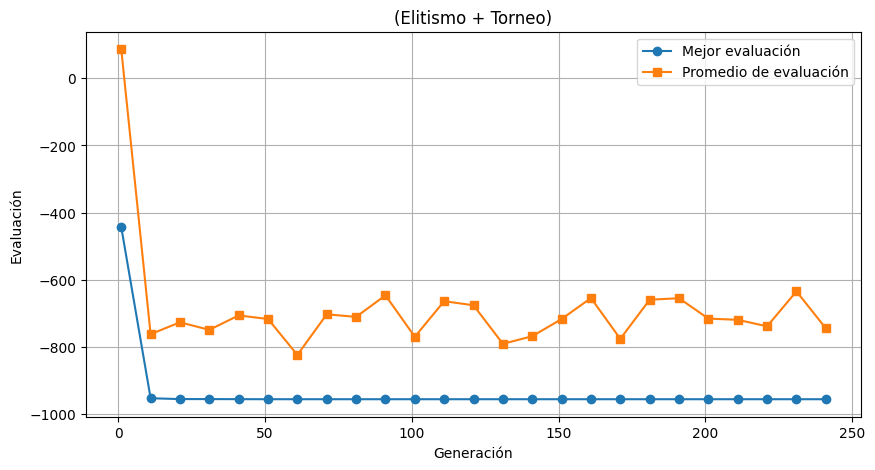

Iteración 5

=== Etapa 1 ===
Generación 10 - Mejor: -941.947 | Promedio: -638.782
Generación 20 - Mejor: -947.287 | Promedio: -677.182
Generación 30 - Mejor: -947.971 | Promedio: -701.599
Generación 40 - Mejor: -951.249 | Promedio: -752.666
Generación 50 - Mejor: -954.521 | Promedio: -619.056
Fin de la Etapa 1: Mejor en etapa: -954.521 | Promedio etapa: -623.067

=== Etapa 2 ===
Generación 60 - Mejor: -954.759 | Promedio: -718.981
Generación 70 - Mejor: -954.768 | Promedio: -629.073
Generación 80 - Mejor: -954.77 | Promedio: -720.686
Generación 90 - Mejor: -954.77 | Promedio: -766.184
Generación 100 - Mejor: -954.77 | Promedio: -682.675
Fin de la Etapa 2: Mejor en etapa: -954.77 | Promedio etapa: -722.728

=== Etapa 3 ===
Generación 110 - Mejor: -954.77 | Promedio: -858.756
Generación 120 - Mejor: -954.77 | Promedio: -744.213
Generación 130 - Mejor: -954.77 | Promedio: -714.269
Generación 140 - Mejor: -954.77 | Promedio: -713.594
Generación 150 - Mejor: -954.77 | Promedio: -705.478
Fin

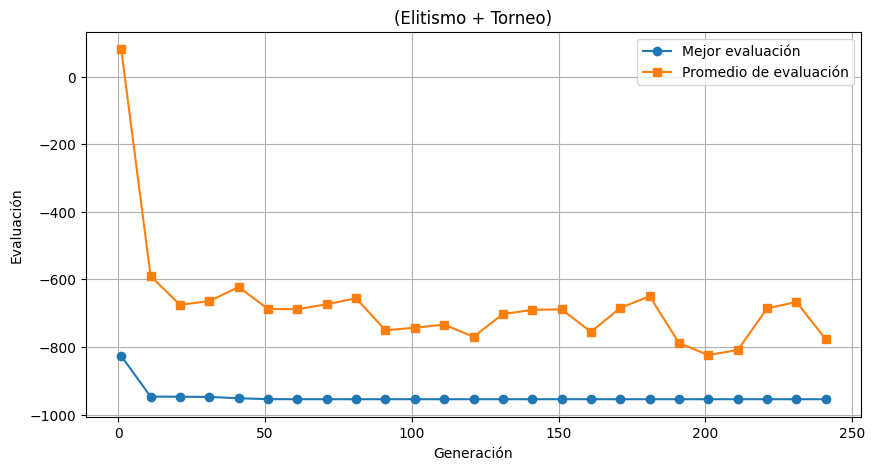

In [14]:
print("Iteración 1")
def main():
    mejor_ind, mejor_apt, total_generacion, h, h_pp = AG_etapas_torneo(
        pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
        etapas, generaciones)
    
    print("\nResultado final:")
    print("Total de generaciones:", total_generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_apt, decimales))
    
    
    gen_indices = np.arange(1, len(h)+1)
    gen_indices_thinned = gen_indices[::10]
    h_thinned = np.array(h)[::10]
    h_pp_thinned = np.array(h_pp)[::10]
    
    plt.figure(figsize=(10, 5))
    plt.plot(gen_indices_thinned, h_thinned, marker='o', linestyle='-', label="Mejor evaluación")
    plt.plot(gen_indices_thinned, h_pp_thinned, marker='s', linestyle='-', label="Promedio de evaluación")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("(Elitismo + Torneo)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    main()
    print("Iteración 2")
if __name__ == "__main__":
    main()
    print("Iteración 3")
if __name__ == "__main__":
    main()
    print("Iteración 4")
if __name__ == "__main__":
    main()
    print("Iteración 5")
if __name__ == "__main__":
    main()            